In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon,gamma
from random import random as rand
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Defining the HMC function,Refering the Book!
def HMC(U,grad_U,epsilon,L,current_q):
    q=current_q
    p=np.random.normal(0,1)
    current_p=p
    
    p=p-epsilon*grad_U(q)/2
    
    for i in range(L):
        q=q+epsilon*p
        if(q<0):
            q=-q
            if(p<0):
                p=-p
        if(i!=L):
            p=p-epsilon*grad_U(q)
    p=p-epsilon*grad_U(q)/2
    p=-p
    current_U=U(current_q)
    current_K=np.sum(np.power(current_p,2))/2
    proposed_U=U(q)
    proposed_K=np.sum(np.power(p,2))/2
    if(rand()<np.exp(current_U-proposed_U+current_K-proposed_K)):
        return q
    else:
        return current_q

In [3]:
#The U function is Exponential
def U(q):
    lamda=2
    return -np.log(expon(scale=1/lamda).pdf(q))
#Differential is 2 
def grad_U(q):
    lamda=2
    return lamda

In [4]:
#Let the Number of Trials be 10,000
trials=10000
trial=np.zeros(trials)
for i in range(trials):
    if(i==1):
        trial[i]=HMC(U,grad_U,0.3,25,1)
    trial[i]=HMC(U,grad_U,0.3,25,trial[i-1])

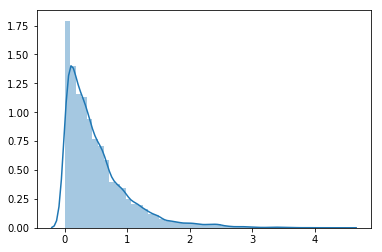

In [5]:
#Output for Epsilon 0.3, plot looks like a Exponential Distribution!
sns.distplot(trial)